# Student Performance Analysis

In [22]:
#  Importing Required Libraries

import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization
import warnings  # Suppress warnings
from sklearn.cluster import KMeans  # Clustering algorithm
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.linear_model import LinearRegression  # Linear regression model

warnings.filterwarnings("ignore")
sns.set(style="whitegrid", font_scale=1.1)


In [23]:
#  Load and Prepare Dataset

df = pd.read_csv(r"C:\Users\girid\Downloads\StudentsPerformance.csv")  # Load dataset


In [24]:
#  Clean column names: convert to lowercase and replace spaces with underscores

df.columns = df.columns.str.lower().str.replace(" ", "_")


##  Data Cleaning & Encoding

In [25]:

#  Convert categorical columns to numeric for analysis

df['gender'] = df['gender'].map({'female': 0, 'male': 1})
df['lunch'] = df['lunch'].map({'standard': 1, 'free/reduced': 0})
df['test_preparation_course'] = df['test_preparation_course'].map({'none': 0, 'completed': 1})
df['race/ethnicity'] = df['race/ethnicity'].astype('category').cat.codes
df['parental_level_of_education'] = df['parental_level_of_education'].astype('category').cat.codes


##  Exploratory Data Analysis (EDA)



First 5 Rows:
    gender  race/ethnicity  parental_level_of_education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test_preparation_course  math_score  reading_score  writing_score  
0                        0          72             72             74  
1                        1          69             90             88  
2                        0          90             95             93  
3                        0          47             57             44  
4                        0          76             78             75  

Shape: (1000, 8)

Columns: ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_sco

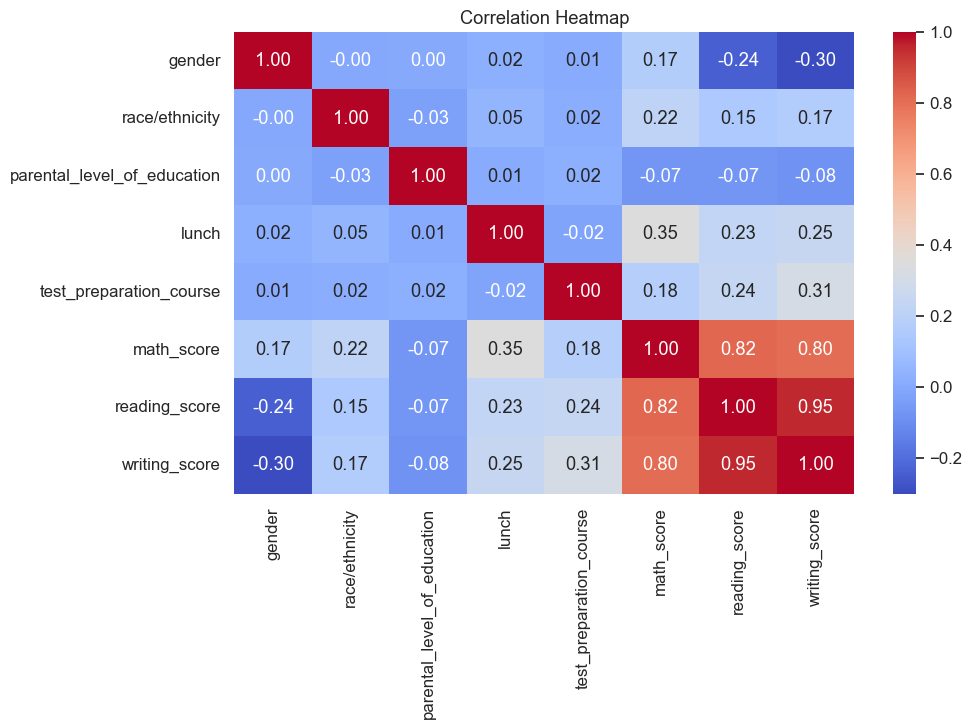

In [26]:

def show_basic_info():
    """Display the first few rows, shape, and column names of the dataset.
    Helps to understand the structure of the data and what fields are available."""
    print("\nFirst 5 Rows:\n", df.head())
    print("\nShape:", df.shape)
    print("\nColumns:", df.columns.tolist())

def show_data_types_and_nulls():
    """Display data types of all columns and check for missing values.
    Ensures all data is properly typed and complete."""
    print("\nData Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())

def show_descriptive_stats():
    """Show summary statistics such as mean, median, standard deviation, etc.
    Helps identify outliers and understand distribution of data."""
    print("\nSummary Statistics:\n", df.describe().T)

def show_unique_counts():
    """Display the number of unique values per column.
    Useful for understanding categorical feature cardinality."""
    print("\nUnique Values Per Column:\n", df.nunique())

def correlation_matrix():
    """Generate and display a correlation matrix for numeric features.
    Highlights how different variables are linearly related to one another."""
    numeric_df = df.select_dtypes(include=[np.number])
    print("\nCorrelation Matrix:\n", numeric_df.corr())
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

show_basic_info()
show_data_types_and_nulls()
show_descriptive_stats()
show_unique_counts()
correlation_matrix()

## Plotting

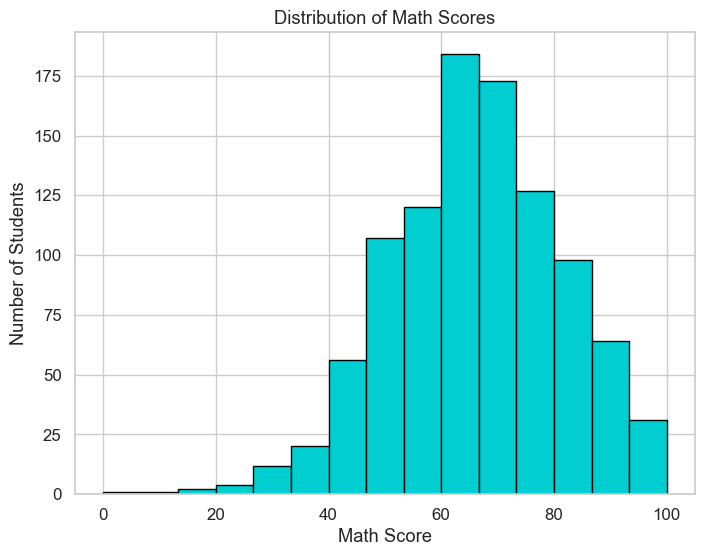

In [33]:
#  Plot 1: Histogram - Math Scores

def plot_math_histogram():
    """Displays a colorful histogram showing the distribution of math scores.
    Useful for visualizing the frequency of score ranges and identifying skewness or peaks."""
    plt.figure(figsize=(8, 6))
    colors = ['#FFD700', '#32CD32', '#FF6347', '#00CED1', '#FF69B4', '#9370DB', '#FFA500']
    plt.hist(df['math_score'], bins=15, color=np.random.choice(colors), edgecolor='black')
    plt.title('Distribution of Math Scores')
    plt.xlabel('Math Score')
    plt.ylabel('Number of Students')
    plt.grid(True)
    plt.show()

plot_math_histogram()

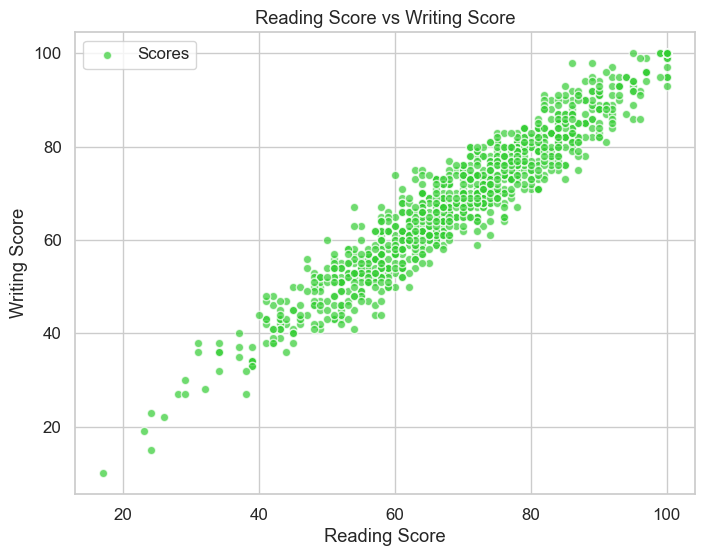

In [28]:
#  Plot 2: Scatter - Reading vs Writing

def plot_reading_vs_writing():
    """Creates a vibrant scatter plot showing the relationship between reading and writing scores.
    Each point represents a student; used to observe trends and outliers."""
    plt.figure(figsize=(8, 6))
    plt.scatter(df['reading_score'], df['writing_score'], color='#32CD32', alpha=0.7, edgecolors='w', label='Scores')
    plt.title('Reading Score vs Writing Score')
    plt.xlabel('Reading Score')
    plt.ylabel('Writing Score')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_reading_vs_writing()


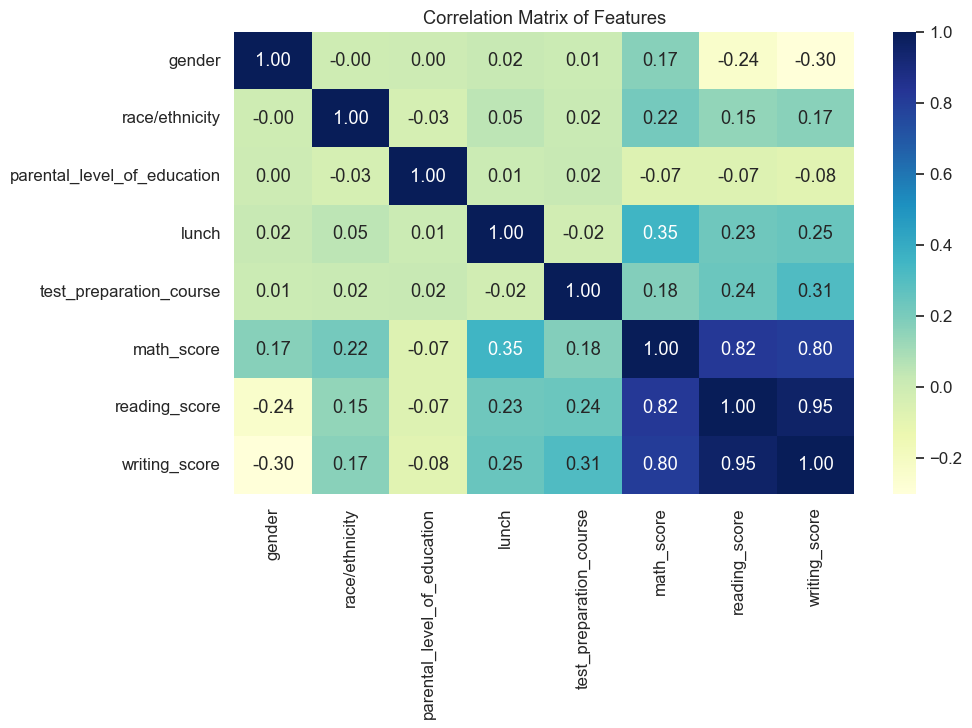

In [29]:
#  Plot 3: Heatmap - Correlations

def plot_correlation_heatmap():
    """Draws a colorful heatmap of correlations between numerical features.
    Brighter colors indicate stronger correlations between score metrics and encoded categories."""
    numeric_df = df.select_dtypes(include=[np.number])
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='YlGnBu')
    plt.title('Correlation Matrix of Features')
    plt.show()

plot_correlation_heatmap()


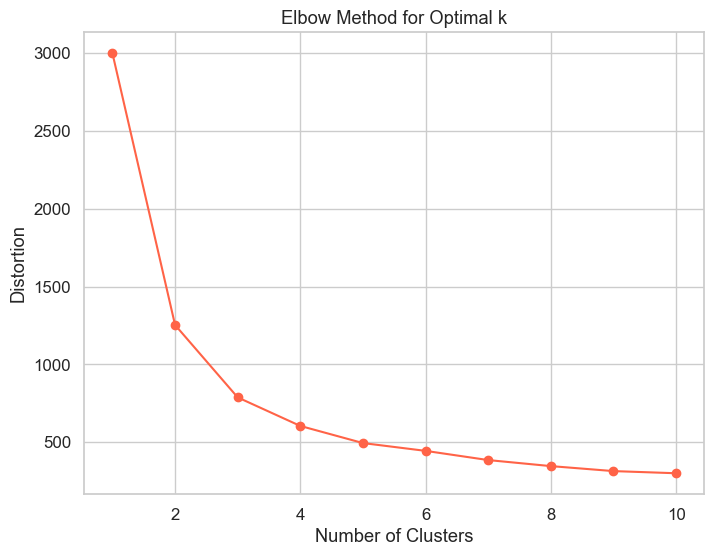

In [30]:
#  Plot 4: Elbow Method for Clustering

def plot_elbow():
    """Plots the Elbow Curve using colorful markers to determine optimal clusters for KMeans.
    The 'elbow' point indicates the most efficient number of clusters before marginal gain drops."""
    features = df[['math_score', 'reading_score', 'writing_score']]
    scaled = StandardScaler().fit_transform(features)
    distortions = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled)
        distortions.append(kmeans.inertia_)
    plt.figure(figsize=(8, 6))
    colors = ['#FFD700', '#32CD32', '#FF6347', '#00CED1', '#FF69B4', '#9370DB', '#FFA500', '#B22222', '#8A2BE2', '#3CB371']
    plt.plot(range(1, 11), distortions, marker='o', linestyle='-', color=np.random.choice(colors))
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.grid(True)
    plt.show()

plot_elbow()


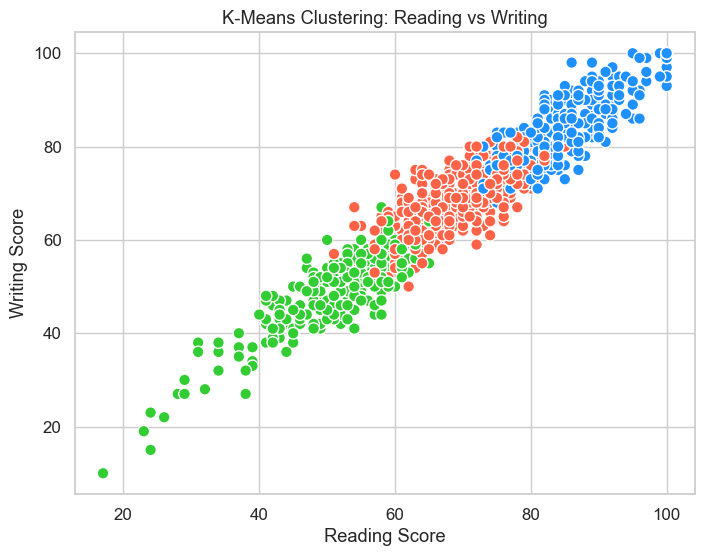

In [36]:
#  K-Means Clustering and Visualization

def perform_clustering(n_clusters=3):
    """Applies KMeans clustering and visualizes the cluster groups on a scatter plot."""
    features = df[['math_score', 'reading_score', 'writing_score']]
    scaled = StandardScaler().fit_transform(features)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['cluster'] = kmeans.fit_predict(scaled)
    colors = ['#FF6347', '#32CD32', '#1E90FF', '#FFD700', '#FF69B4']
    cluster_colors = [colors[i % len(colors)] for i in df['cluster']]
    plt.figure(figsize=(8, 6))
    plt.scatter(df['reading_score'], df['writing_score'], c=cluster_colors, s=70, edgecolors='white')
    plt.title('K-Means Clustering: Reading vs Writing')
    plt.xlabel('Reading Score')
    plt.ylabel('Writing Score')
    plt.grid(True)
    plt.show()

perform_clustering()



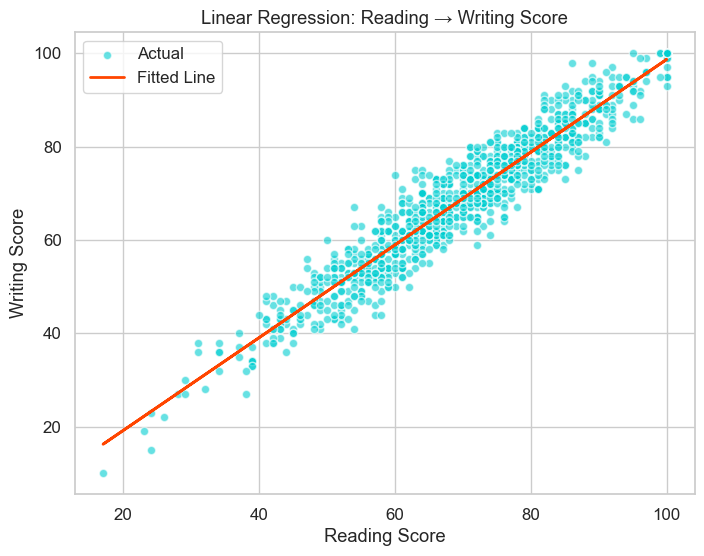

R² Score: 0.911


In [37]:
# Linear Regression: Reading → Writing

def perform_regression():
    """Performs linear regression to predict writing score from reading score and plots the result."""
    X = df[['reading_score']]
    y = df['writing_score']
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='#00CED1', alpha=0.6, edgecolors='white', label='Actual')
    plt.plot(X, predictions, color='#FF4500', linewidth=2, label='Fitted Line')
    plt.title('Linear Regression: Reading → Writing Score')
    plt.xlabel('Reading Score')
    plt.ylabel('Writing Score')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"R² Score: {model.score(X, y):.3f}")

perform_regression()